# Podatki o študentskih delih

In [327]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)

%matplotlib inline

DELA = pd.read_csv("studentska_dela.csv", index_col="delo")

Tabela, ki prikazuje 2000 oglasov

In [328]:
DELA

,plača neto,kraj,delovnik,trajanje
delo,,,,
POMOČ V KUHINJI,9.00 €/h neto,GOLNIK,PO DOGOVORU,PO DOGOVORU
DELO V RENT A CAR AGENCIJI,6.88 €/h neto,CELJE IN OKOLICA,PO DOGOVORU,DLJE ČASA (ZAČ. IN OBČ. DELO)
DELO V SKLADIŠČU,7.22 €/h neto,MARIBOR,DOPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
POMOČ PRI PRODAJI,6.88 €/h neto,LESCE,PO DOGOVORU,DLJE ČASA (ZAČ. IN OBČ. DELO)
UREJANJE OKOLICE,7.74 €/h neto,MARIBOR,DOPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
...,...,...,...,...
TEHNIČNA POMOČ,8.00 €/h neto,LJUBLJANA RUDNIK,IZMENSKO,DLJE ČASA (ZAČ. IN OBČ. DELO)
POMOČ V TRGOVINI,6.88 €/h neto,BLED,IZMENSKO,DLJE ČASA (ZAČ. IN OBČ. DELO)
PRODAJA,9.47 €/h neto,BLED,IZMENSKO,DLJE ČASA (ZAČ. IN OBČ. DELO)


Podtabela, kjer so dela razporejena od najbolj do najmanj plačanih

In [329]:
podtabela = DELA.copy()
podtabela["plača neto"] = podtabela["plača neto"].str.extract(r'(\d+\.\d+)').astype(float)
podtabela = podtabela.sort_values("plača neto", ascending=False).dropna(subset=["plača neto"])
podtabela["plača neto"] = podtabela["plača neto"].astype(str) + " €/h neto"
podtabela

,plača neto,kraj,delovnik,trajanje
delo,,,,
TRENER/KA,20.0 €/h neto,RADOVLJICA,POPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
TRENER/KA,20.0 €/h neto,LJUBLJANA,POPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
POUČEVANJE,20.0 €/h neto,KAMNIK,POPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
TRENER/KA,20.0 €/h neto,LJUBLJANA,POPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
VADITELJ/ICA,20.0 €/h neto,VELENJE,DOPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
...,...,...,...,...
POMOČ V STREŽBI,6.2 €/h neto,ORMOŽ,IZMENSKO,DLJE ČASA (ZAČ. IN OBČ. DELO)
DELO V KUHINJI,6.2 €/h neto,MALEČNIK,MED VIKENDI,PO DOGOVORU
LAŽJA FIZIČNA DELA,6.2 €/h neto,LJUBLJANA,PO DOGOVORU,DLJE ČASA (ZAČ. IN OBČ. DELO)


Funkcija, ki vrne slovar, kjer ključi predstavljajo število možnih del, glede na delovnik

In [330]:
def šteje_dela_po_delovniku(DELA):
    preštevanje = {
        'Dopoldan': int(DELA['delovnik'].str.contains('DOPOLDAN').sum()),
        'Popoldan': int(DELA['delovnik'].str.contains('POPOLDAN').sum()),
        'Po dogovoru': int(DELA['delovnik'].str.contains('PO DOGOVORU').sum()),
        'Izmensko': int(DELA['delovnik'].str.contains('IZMENSKO').sum())
    }
    preštevanje['Ostalo'] = int(DELA[~DELA['delovnik'].str.contains('DOPOLDAN|POPOLDAN|PO DOGOVORU|IZMENSKO', case=False, na=False)].shape[0])
    return preštevanje

slovar = šteje_dela_po_delovniku(DELA)
slovar

{'Dopoldan': 536,
 'Popoldan': 168,
 'Po dogovoru': 625,
 'Izmensko': 617,
 'Ostalo': 54}

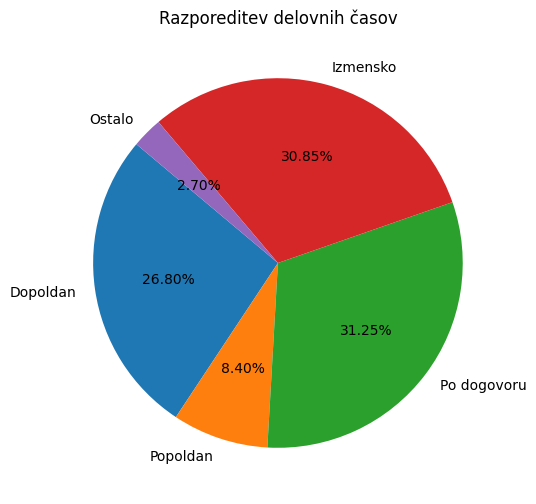

In [331]:
čas_dela = list(slovar.keys())
število_del = list(slovar.values())
plt.figure(figsize=(6, 6))
plt.pie(število_del, labels=čas_dela, autopct='%1.2f%%', startangle=140)
plt.title('Razporeditev delovnih časov')
plt.show()

# Dela v Ljubljani

In [332]:
dela_v_Lj = DELA[DELA['kraj'].str.contains('Ljubljana', case=False, na=False)]
dela_v_Lj

,plača neto,kraj,delovnik,trajanje
delo,,,,
POUČEVANJE,8.00 €/h neto,LJUBLJANA,DOPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
DELO NA RECEPCIJI,7.31 €/h neto,LJUBLJANA,POPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
MONTAŽA,8.45 €/h neto,LJUBLJANA,DOPOLDAN,"PONEDELJEK, 26. 8. 2024"
TELEFONSKI MARKETING,8.61 €/h neto,LJUBLJANA,DOPOLDAN,CCA. 7 - 14 DNI
POMOČ PRI PRODAJI,6.80 €/h neto,LJUBLJANA - BTC,PO DOGOVORU,DLJE ČASA (ZAČ. IN OBČ. DELO)
...,...,...,...,...
STREŽBA,9.98 €/h neto,LJUBLJANA - ČRNUČE,PO DOGOVORU,DLJE ČASA (ZAČ. IN OBČ. DELO)
TRENER/KA,12.91 €/h neto,LJUBLJANA BRDO,IZMENSKO,DLJE ČASA (ZAČ. IN OBČ. DELO)
POMOČ V STREŽBI,8.50 €/h neto,LJUBLJANA - CENTER,PO DOGOVORU,DLJE ČASA (ZAČ. IN OBČ. DELO)


Funkcija, ki vrne slovar, katerega ključi so števila možnih del glede na delovnik

In [333]:
def šteje_dela_po_delovniku(dela_v_Lj):
    preštevanje = {
        'Dopoldan': int(dela_v_Lj['delovnik'].str.contains('DOPOLDAN').sum()),
        'Popoldan': int(dela_v_Lj['delovnik'].str.contains('POPOLDAN').sum()),
        'Po dogovoru': int(dela_v_Lj['delovnik'].str.contains('PO DOGOVORU').sum()),
        'Izmensko': int(dela_v_Lj['delovnik'].str.contains('IZMENSKO').sum())
    }
    preštevanje['Ostalo'] = int(dela_v_Lj[~dela_v_Lj['delovnik'].str.contains('DOPOLDAN|POPOLDAN|PO DOGOVORU|IZMENSKO', case=False, na=False)].shape[0])
    return preštevanje

števila = šteje_dela_po_delovniku(dela_v_Lj)
števila

{'Dopoldan': 264,
 'Popoldan': 61,
 'Po dogovoru': 195,
 'Izmensko': 189,
 'Ostalo': 8}

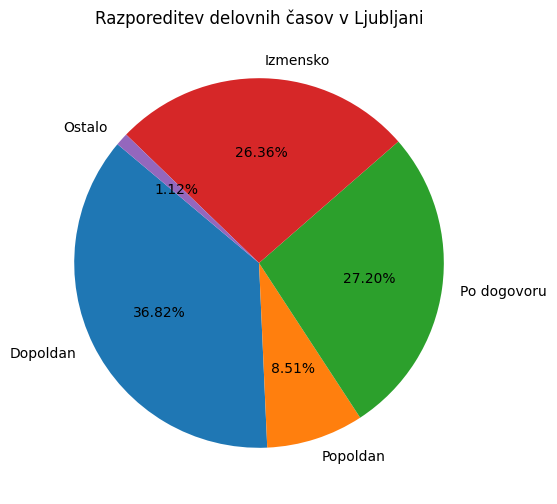

In [334]:
čas_dela = list(števila.keys())
število_del = list(števila.values())
plt.figure(figsize=(6, 6))
plt.pie(število_del, labels=čas_dela, autopct='%1.2f%%', startangle=140)
plt.title('Razporeditev delovnih časov v Ljubljani')
plt.show()

Ločimo dela v Ljubljani glede na velikost plače

In [335]:
plača_do_osem = dela_v_Lj[(dela_v_Lj['plača neto'] >= '6.2 €/h neto') & (dela_v_Lj['plača neto'] <= '7.99 €/h neto')].sort_values('plača neto', ascending= False)
plača_do_osem[['plača neto']]

,plača neto
delo,
ADMINISTRATIVNA DELA,7.94 €/h neto
POMOČ V STREŽBI,7.85 €/h neto
PROJEKTIRANJE,7.80 €/h neto
DELO V SKLADIŠČU,7.80 €/h neto
DELO V KUHINJI,7.80 €/h neto
...,...
POMOČ V STREŽBI,6.20 €/h neto
ETIKETIRANJE,6.20 €/h neto
PRODAJA,6.20 €/h neto


In [336]:
do_osem = plača_do_osem.groupby('plača neto').size()
do_osem

plača neto
6.20 €/h neto    74
6.24 €/h neto     3
6.37 €/h neto     1
6.41 €/h neto     1
6.45 €/h neto    33
                 ..
7.70 €/h neto     2
7.74 €/h neto    38
7.80 €/h neto     3
7.85 €/h neto     1
7.94 €/h neto     1
Length: 40, dtype: int64

<Axes: xlabel='plača neto'>

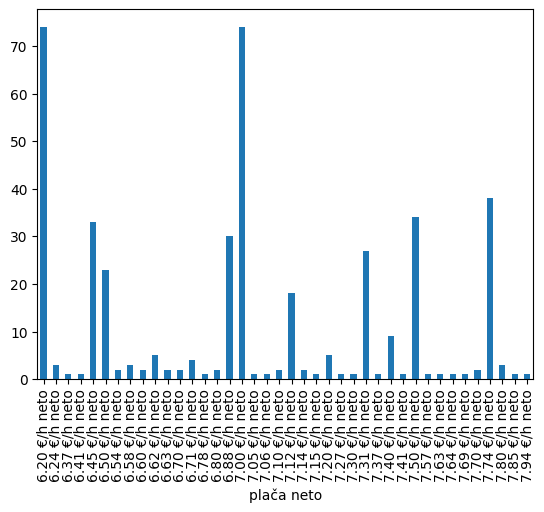

In [337]:
do_osem.plot.bar()

In [338]:
plača_do_osem_do_deset = dela_v_Lj[(dela_v_Lj['plača neto'] > '7.99 €/h neto') & (dela_v_Lj['plača neto'] <= '9.99 €/h neto')].sort_values('plača neto', ascending=False)
plača_do_osem_do_deset[['plača neto']]

,plača neto
delo,
STREŽBA,9.98 €/h neto
STROJNIŠKA DELA,9.90 €/h neto
INFORMATIKA,9.90 €/h neto
STREŽBA,9.50 €/h neto
DELO V KUHINJI,9.50 €/h neto
...,...
ZAHTEVNA ADMINISTRATIVNA DELA,8.00 €/h neto
PRODAJA,8.00 €/h neto
DELO V KUHINJI,8.00 €/h neto


In [339]:
filter1 = plača_do_osem_do_deset.groupby('plača neto').size()
filter1

plača neto
8.00 €/h neto    81
8.05 €/h neto     2
8.09 €/h neto     1
8.15 €/h neto     5
8.17 €/h neto     6
                 ..
9.30 €/h neto     6
9.47 €/h neto     7
9.50 €/h neto     3
9.90 €/h neto     2
9.98 €/h neto     1
Length: 27, dtype: int64

<Axes: xlabel='plača neto'>

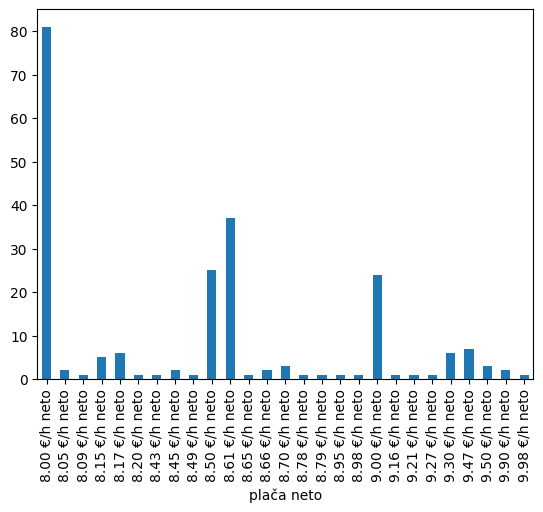

In [340]:
filter1.plot.bar()

In [341]:
plača_nad_deset = dela_v_Lj[(dela_v_Lj['plača neto'] > '10.00 €/h neto') & (dela_v_Lj['plača neto'] < '50.0 €/h neto')].sort_values('plača neto', ascending= False)
plača_nad_deset[['plača neto']]

,plača neto
delo,
TRENER/KA,20.00 €/h neto
TRENER/KA,20.00 €/h neto
PROGRAMIRANJE,15.27 €/h neto
PROGRAMIRANJE,15.27 €/h neto
PRODAJA,15.27 €/h neto
...,...
POUČEVANJE,10.62 €/h neto
PROGRAMIRANJE,10.50 €/h neto
STREŽBA HRANE IN PIJAČE,10.33 €/h neto


In [342]:
filter2 = plača_nad_deset.groupby('plača neto').size()
filter2

plača neto
10.15 €/h neto    1
10.18 €/h neto    1
10.33 €/h neto    1
10.50 €/h neto    1
10.62 €/h neto    1
                 ..
13.77 €/h neto    4
14.00 €/h neto    1
15.00 €/h neto    7
15.27 €/h neto    3
20.00 €/h neto    2
Length: 17, dtype: int64

<Axes: xlabel='plača neto'>

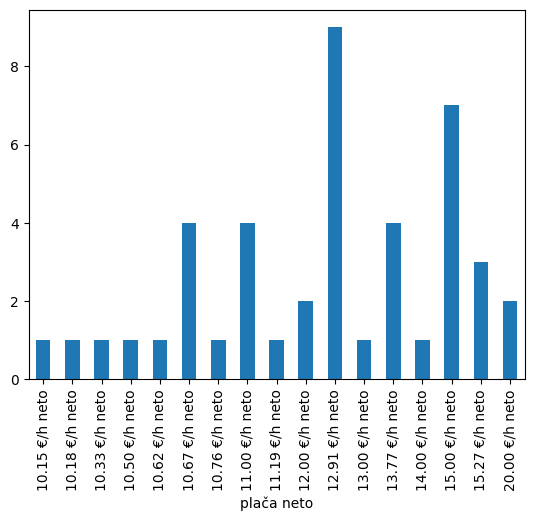

In [343]:
filter2.plot.bar()

# Dela izven Ljubljane

In [344]:
ne_v_Lj = DELA[~DELA['kraj'].str.contains('Ljubljana', case= False)]
ne_v_Lj

,plača neto,kraj,delovnik,trajanje
delo,,,,
POMOČ V KUHINJI,9.00 €/h neto,GOLNIK,PO DOGOVORU,PO DOGOVORU
DELO V RENT A CAR AGENCIJI,6.88 €/h neto,CELJE IN OKOLICA,PO DOGOVORU,DLJE ČASA (ZAČ. IN OBČ. DELO)
DELO V SKLADIŠČU,7.22 €/h neto,MARIBOR,DOPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
POMOČ PRI PRODAJI,6.88 €/h neto,LESCE,PO DOGOVORU,DLJE ČASA (ZAČ. IN OBČ. DELO)
UREJANJE OKOLICE,7.74 €/h neto,MARIBOR,DOPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
...,...,...,...,...
POMOČ V TRGOVINI,6.88 €/h neto,TRBOVLJE,IZMENSKO,DLJE ČASA (ZAČ. IN OBČ. DELO)
POMOČ V TRGOVINI,6.88 €/h neto,BLED,IZMENSKO,DLJE ČASA (ZAČ. IN OBČ. DELO)
PRODAJA,9.47 €/h neto,BLED,IZMENSKO,DLJE ČASA (ZAČ. IN OBČ. DELO)


Oglejmo si trajanje in delovnik

In [345]:
trajanje_in_delovnik = ne_v_Lj[['delovnik', 'trajanje']].copy()
trajanje_in_delovnik

,delovnik,trajanje
delo,,
POMOČ V KUHINJI,PO DOGOVORU,PO DOGOVORU
DELO V RENT A CAR AGENCIJI,PO DOGOVORU,DLJE ČASA (ZAČ. IN OBČ. DELO)
DELO V SKLADIŠČU,DOPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
POMOČ PRI PRODAJI,PO DOGOVORU,DLJE ČASA (ZAČ. IN OBČ. DELO)
UREJANJE OKOLICE,DOPOLDAN,DLJE ČASA (ZAČ. IN OBČ. DELO)
...,...,...
POMOČ V TRGOVINI,IZMENSKO,DLJE ČASA (ZAČ. IN OBČ. DELO)
POMOČ V TRGOVINI,IZMENSKO,DLJE ČASA (ZAČ. IN OBČ. DELO)
PRODAJA,IZMENSKO,DLJE ČASA (ZAČ. IN OBČ. DELO)


Histogram, ki prikazuje delovnik in število del, za določen delovni čas

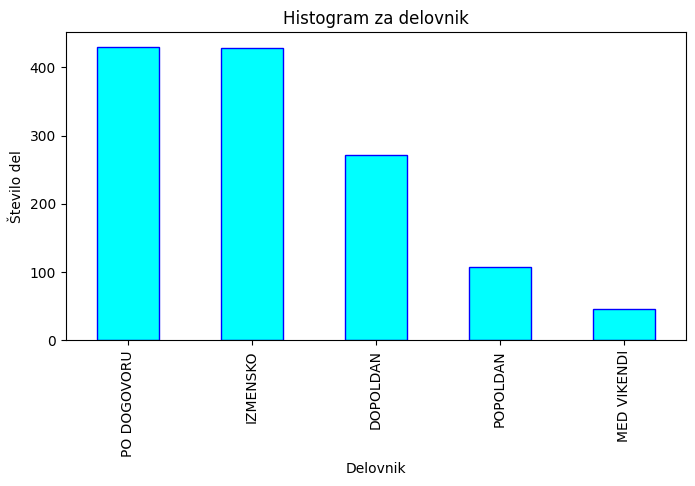

In [346]:
plt.figure(figsize=(8, 4))
trajanje_in_delovnik['delovnik'].value_counts().plot(kind='bar', color='cyan', edgecolor='blue')
plt.title('Histogram za delovnik')
plt.xlabel('Delovnik')
plt.ylabel('Število del')
plt.show()